# Regression model: Housing Price

## 1. Introduction 

### 1.1 Domain specific area

Housing price increases every year, and with an increasing demand for houses and lack of space, it is easy to see why it is getting more expensive especially if people are planning to live in the city. Even though some people might choose to live in the suburb or rural areas, prices are still subject to demand and location. According to Redfin, housing prices in the last five years have been slowly increasing at an all-time high in May 2022 at $430,000. 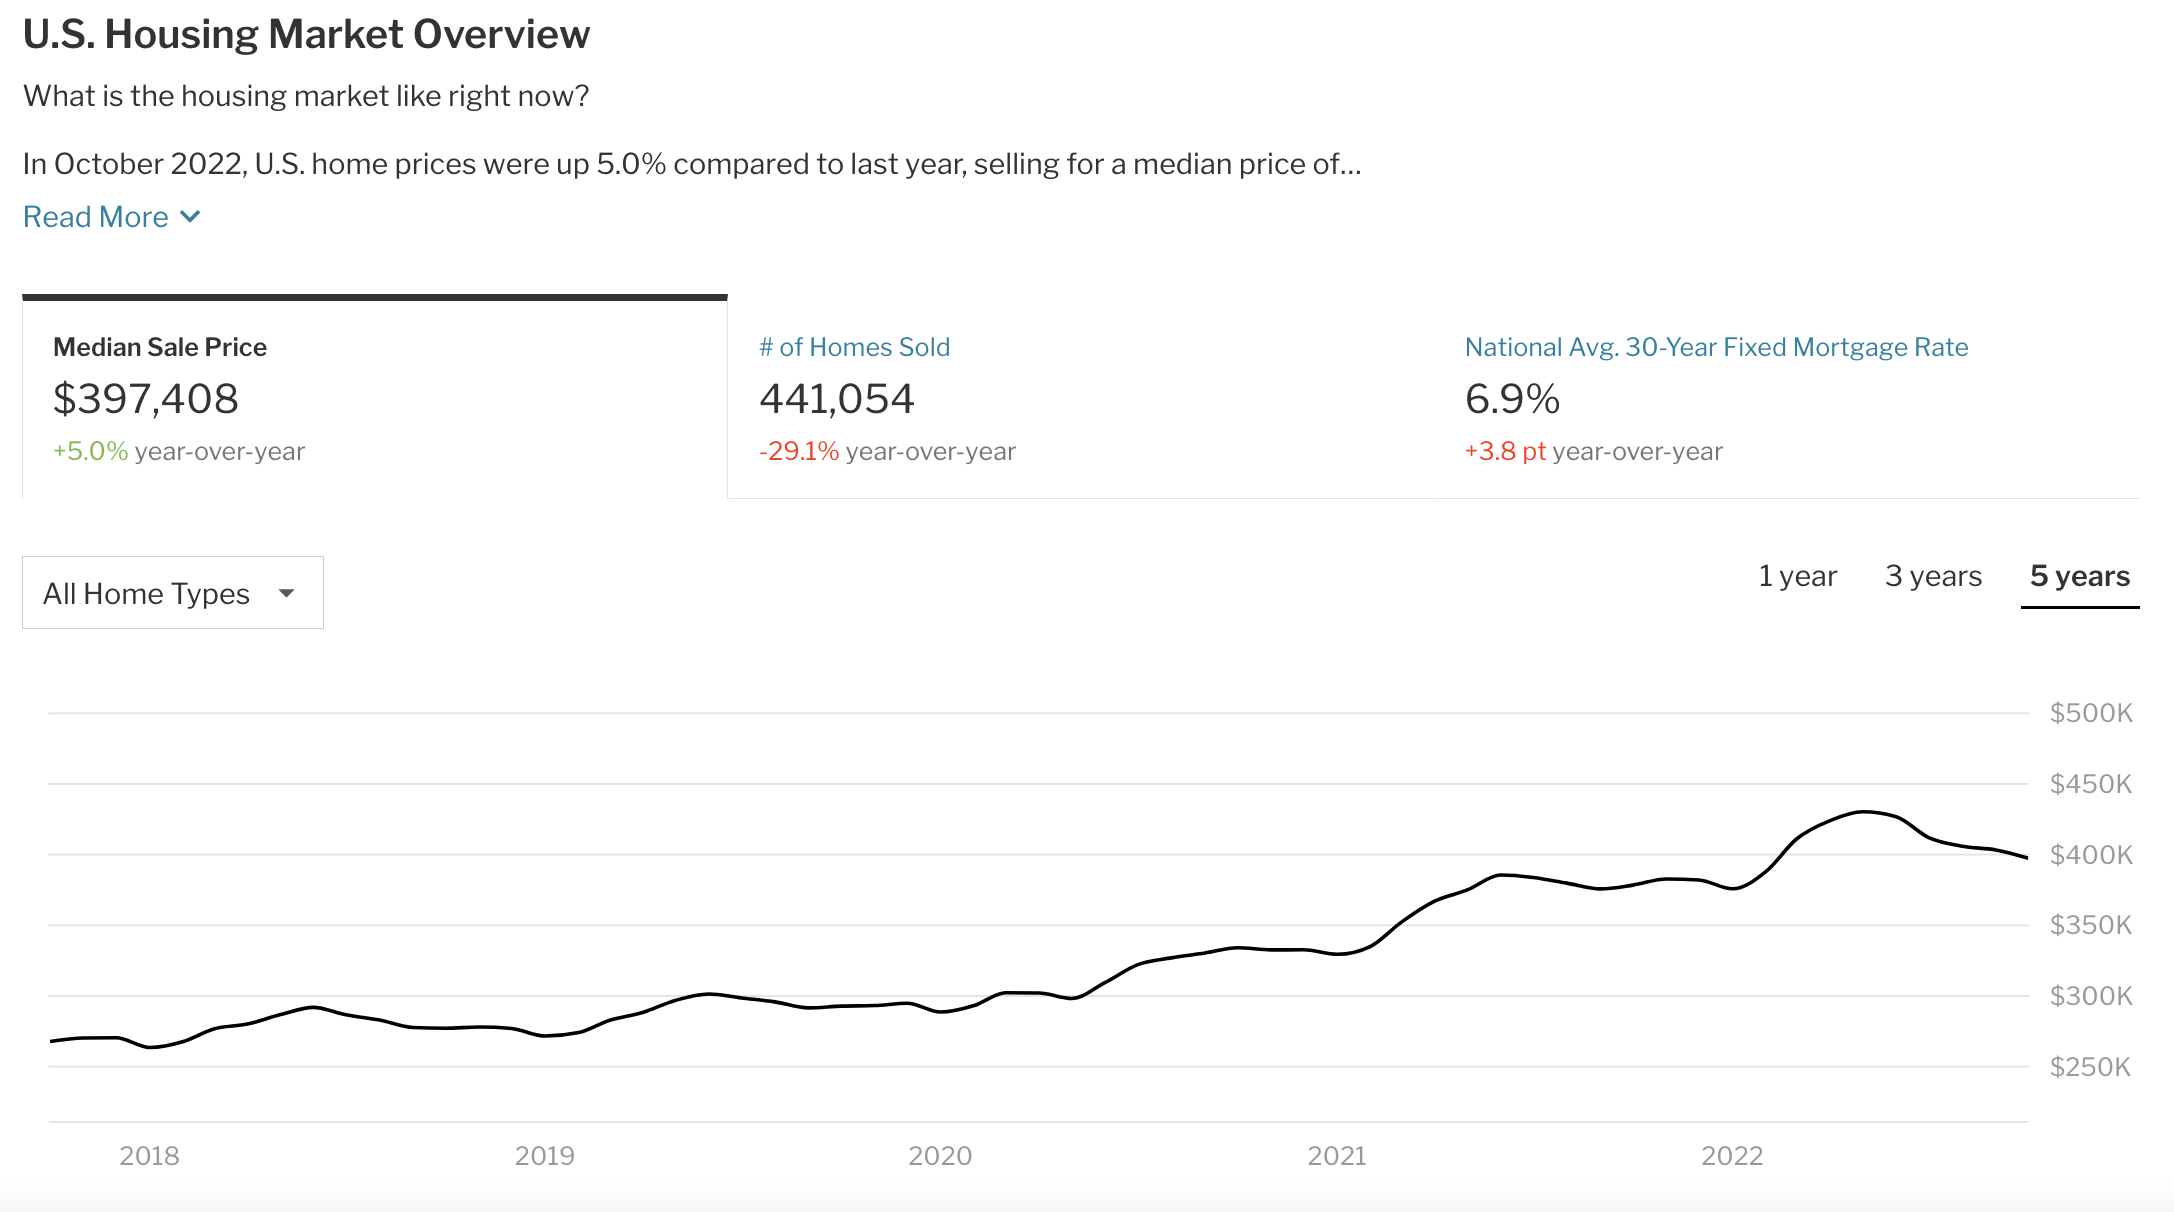

Hence, there is a need for a system to predict house prices in the future. 
The regression model used will take in a set of data containing multiple factors to predict an estimated price range for the specific house. House price prediction can help developers determine the selling price of a house and can help future homeowners to arrange the right time to purchase a home. 

###  1.2 Dataset
The dataset will be of residential homes in Ames, Iowa. It is split into 2 files, training and testing, in the CSV format allowing it to be easily used with Pandas and it consists of many information such as sales price, street, condition etc. There are more than enough features that the regression model can use to predict the values.

The training file will be used to train the regression model and the testing file will be used to predict the values. This allows me to see whether the model is effective on unseen data.


###  1.3 Objectives

The main objective of this project:
- To predict the sales price of each house

For each id in the set, i will be using a regression model to predict the value of the SalePrice variable

There are 4 main steps i have to follow through:
1. cleaning the data to make it usable
2. visualizing the data
3. training the model
4. Making predictions using the model

This regression model will allow us to predict the house prices in the area which is good for developers who want to estimate how much houses will be sold for and homeowners who want to purchase a new house.

### 1.4 Disclaimer

As this project is used for personal and educational purpose, any conclusions from this project will be based on assumptions after looking at the predicted values and should not be used as a professional analytical judgement.



## 2. Implementation 
Importing necessary Data and libraries

In [1]:
#importing necessary libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



Loading the training data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 2.1 Cleaning the training dataset
Checking the percentage of missing values.

In [3]:
missingSum = df_train.isna().sum().sort_values(ascending=False)
percentage = (df_train.isna().sum()/df_train.isna().count() * 100).sort_values(ascending=False)
missingData = pd.concat([missingSum, percentage], axis=1, keys=['missingSum', 'percentage'])
missingData.head(10)

,missingSum,percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


Remove all columns with more than 10% of missing values as there is too many missing data

In [4]:
#calculates columns with more than 10% of values missingColumn
missingColumn = df_train.isna().sum()
missingColumn = missingColumn[missingColumn > 0.1*len(df_train.index)] 

#removes column
df_train2 = df_train.drop(columns=missingColumn.index) 
df_train2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Look at the remaining data info

In [5]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Looking at columns only with int or float

In [6]:
intOrFloat = [x for x in df_train2.columns if df_train2.dtypes[x] != 'object'] #list of columns with int or float
intOrFloat

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

A new dataframe built using only integer or float values for the regression model.

In [7]:
df_train3 = df_train2[intOrFloat]
df_train3

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


there are still some missing values

In [8]:
missing2 = df_train3.isnull().sum()
missing2 = missing2[missing2 > 0] #columns with missing values
missing2

MasVnrArea      8
GarageYrBlt    81
dtype: int64

Fill missing columns with mean

In [9]:
#caluclates the mean in the column and fills missing value with it
def fillMissing(dataframe,column):
    mean = dataframe[column].mean()
    dataframe[column].fillna(value=mean,inplace=True)
    return dataframe

fillMissing(df_train3,'MasVnrArea')
fillMissing(df_train3,'GarageYrBlt')

/Users/ronaldgohjingwei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


Training dataset after cleaning

In [10]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [11]:
pd.set_option('max_columns',None) # show all columns
df_train3

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [12]:
pd.reset_option('max_columns') #resets max number of columns displayed to default

### 2.2 Identify key series, provide statistical summary and visualizing
As our main focus is the sales price, lets find out the the statistical value for sales price, comparing houseprice versus year the house was built in.

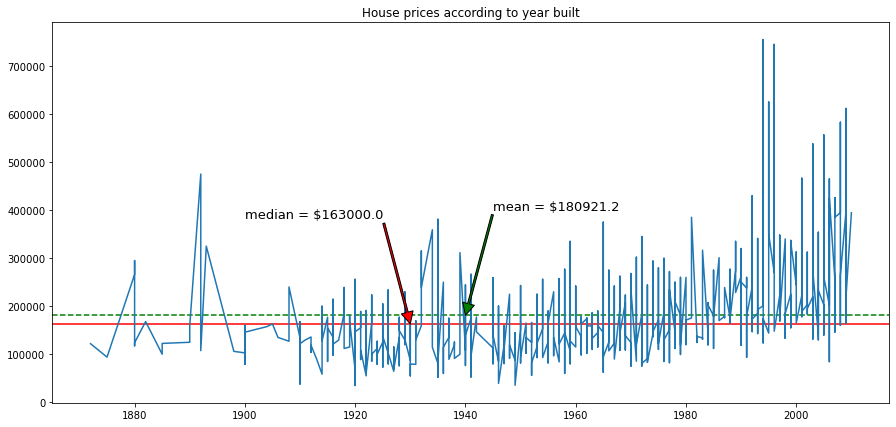

In [13]:
#calculate mean
yearPrice = pd.concat([df_train3['YearBuilt'], df_train3['SalePrice']], 
                      axis=1, keys=['YearBuilt', 'SalePrice'],sort=True)
yearPrice= yearPrice.sort_values('YearBuilt', ascending=True)
mean = round(yearPrice['SalePrice'].mean(),1)

#calculate median
median = yearPrice['SalePrice'].median()

plt.subplots(figsize=(15, 7))
plt.title('House prices according to year built')
#draws horizontal line
plt.axhline(mean,c='g',linestyle='dashed')
plt.axhline(median,c='r',linestyle='-')
plt.plot(yearPrice['YearBuilt'],yearPrice['SalePrice'])
#annotates on the graph
plt.annotate(f'mean = ${mean}',xy=(1940,mean),xytext=(1945,mean+220000),fontsize=13,
            arrowprops=dict(facecolor='g',width=2))
plt.annotate(f'median = ${median}',xy=(1930,median),xytext=(1900,median+220000),fontsize=13,
            arrowprops=dict(facecolor='r',width=2))
plt.show()

The results show a slight increase in the price overall as it goes on to 2000 onwards with a few units that sold higher than average. However prices are also affected by other factors including the size of the house and facilities, this graph only shows the price in relation to when the house is built and does not entirely depict the house price.


Using a box plot to show the distribution of numerical data and skewness through displaying the data quartiles.

In [14]:
yearPrice['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/ronaldgohjingwei/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


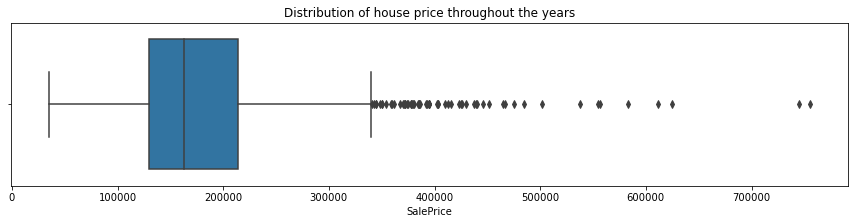

In [15]:
plt.subplots(figsize=(15, 3))
ax = sns.boxplot( yearPrice['SalePrice'])
ax.set_title('Distribution of house price throughout the years')
plt.show()

Just by looking at the boxplot, most of the houses are sold at around 130,000 to 210,000. 
With a minimum price at 35,000. 
As regards to the maximum price there are a some outliers but the highest amount sold is around 750,000 

Using a distibution plot to show the measure of the asymmetry of a plot.

/Users/ronaldgohjingwei/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


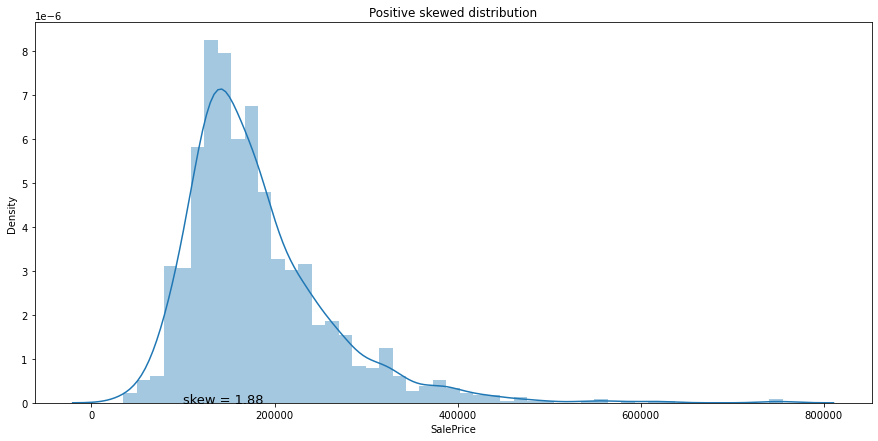

In [16]:
plt.subplots(figsize=(15, 7))
dist = sns.distplot(yearPrice['SalePrice'])
skew = yearPrice['SalePrice'].skew()
dist.set_title('Positive skewed distribution')
plt.annotate(f'skew = {round(skew,2)}',xy=(100000,0),fontsize=13)
plt.show()

using a normal distribution, it is longer on the right side of its peak which indicates a positive skew.
The mean of a right-skewed distribution is almost always greater than its median which is proven true by comparing the values from yearPrice['SalePrice'].describe().

### 2.3 Identifying core features using correlation
correlation is any statistical relationship, whether causal or not, between two random variables.

In [17]:
correlationTable = df_train3.corr() #Compute pairwise correlation of columns
correlationTable             

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Creating a dataframe where only features with correlation of more than 0.5 with 'SalePrice'

In [18]:
correlationSale = correlationTable[correlationTable['SalePrice']>0.5] 
correlationSale

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.126031,0.550600,-0.194149,0.468271,0.439046,0.275730,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280027,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,0.016570,-0.040110,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


New dataframe built with features with correlation > 0.5 with SalePrice


In [19]:
df_train4 = df_train3[correlationSale.index]
df_train4   

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


Final correlation table with only features that are > 0.5 with 'Saleprice'

In [20]:
correlationTable2 = df_train4.corr()

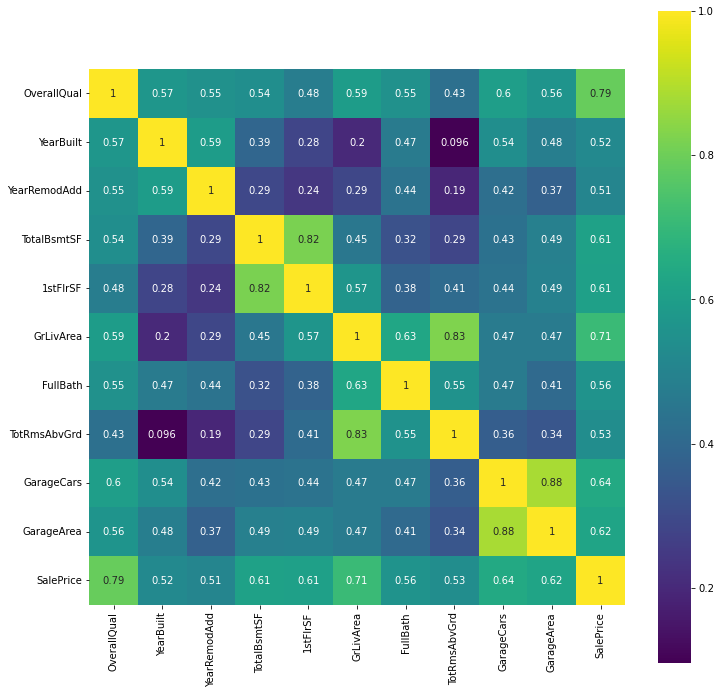

In [21]:
plt.subplots(figsize=(12, 12))
sns.heatmap(correlationTable2,square=True,cmap='viridis',annot=True )
plt.show()


#### Adjusting outliers
As seen from the boxplot, there are several outliers value which are an exception, their values have to be adjusted or it will affect the result of the regression model when training it.

In [22]:
df_train4.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


One way to remove the outliers is to limit it based on the IQR. By removing adjusting values that lie outside the range defined by the quartiles +/- 1.5 * IQR.

In [23]:
iqRange = df_train4.describe().SalePrice[6] - df_train4.describe().SalePrice[4] 

I have tried different values of multiplying iqRange and found 1.5 to be the most optimal, as it has the best R-squared score, which will be shown below.

In [24]:
boundary = iqRange * 1.5
boundary

126037.5

In [25]:
upperBoundary = df_train4.describe().SalePrice[6] + boundary  #upper selling price boundary
upperBoundary

340037.5

creating 2 dataframes to seperate Saleprice above the upperBoundary and lesser than the upperBoundary


In [26]:
df_train5 = (df_train4[df_train4['SalePrice']<upperBoundary])   

In [27]:
df_train6 = (df_train4[df_train4['SalePrice']>upperBoundary])  

As the outliers are mostly above the upper boundary, the outlier's value will be changed to the upperBoundary value.


In [28]:
df_train6['SalePrice'] = upperBoundary
df_train6

/var/folders/63/48hcdx8x3_s9lh_x2yvfm0kc0000gn/T/ipykernel_2841/1041908506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train6['SalePrice'] = upperBoundary


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
11,9,2005,2006,1175,1182,2324,3,11,3,736,340037.5
53,9,1981,1987,1842,1842,1842,0,5,3,894,340037.5
58,10,2006,2006,1410,1426,2945,3,10,3,641,340037.5
112,7,2007,2007,1264,1282,2696,2,10,3,792,340037.5
151,8,2007,2008,1710,1710,1710,2,6,3,866,340037.5
...,...,...,...,...,...,...,...,...,...,...,...
1268,8,1935,1997,728,1968,3447,3,11,3,1014,340037.5
1353,8,1995,1996,2033,2053,3238,2,9,3,666,340037.5
1373,10,2001,2002,2633,2633,2633,2,8,3,804,340037.5
1388,9,2006,2007,1746,1746,1746,2,7,3,758,340037.5


Combine the 2 dataframes with outliers adjusted.

In [29]:
df_train7 = pd.concat([df_train5,df_train6])

Ensuring that the ouliers have been adjusted by checking the max value of 'Saleprice'

In [30]:
df_train7['SalePrice'].describe() 

count      1460.000000
mean     177331.526370
std       67205.835915
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      340037.500000
Name: SalePrice, dtype: float64

as seen from the max price of SalePrice the upper boundary has been set proeprly

In [31]:
df_train7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1437
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   GrLivArea     1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   GarageCars    1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  SalePrice     1460 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 136.9 KB


## Model training
with the training data modified, we can now split the data into training set and testing set.

In [32]:
x = df_train7.drop('SalePrice', axis=1) # removing the 'SalePrice' as thats is what i am training the model on
y = df_train7['SalePrice']

# splitting data into train and test data set
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

using polynomial regression and linear regression to train the model to predict y.

In [33]:
polyRegress = PolynomialFeatures(degree = 2) # not using a high degree to prevent overfitting
x_poly = polyRegress.fit_transform(x_train) #adding x^2 to the feature set
regression = LinearRegression()
regression.fit(x_poly,y_train) #train x_poly beacuse we have additional information

x_test_polyRegress = polyRegress.fit_transform(x_test)
y_pred = regression.predict(x_test_polyRegress)
y_pred

array([109490.04290584, 198401.83800896, 183051.28304756, 251839.77867655,
       256749.86424462, 150921.34086749, 276431.54342893, 114082.66795201,
       191252.62517434, 198151.9429883 ,  95010.66064509, 189008.70705185,
       178580.28292495, 140074.83916597, 147375.05401192, 103738.88117345,
       198747.49441399, 127827.89923728, 207644.82935299, 222580.06578013,
       102574.32572919, 146715.94021172, 136791.14975238, 246348.54539633,
        75856.08930946,  85422.50244164, 135055.82809152, 219539.61530853,
       298169.41165207, 147896.08475747, 173361.31392929, 177641.04041121,
       268574.02518588, 285738.00151856, 210474.9946175 , 137971.64473948,
       287004.66824406, 204780.52074055, 121346.67124245, 182729.05589037,
        99061.89246649, 218235.35513316, 194548.41612074, 191324.76039823,
        98373.61235796, 143795.86257744, 113705.84597463, 129350.98952957,
       242292.02849521, 108631.67690599, 311997.37161289, 153024.91072173,
       300649.21150898, 2

 ### Cleaning test dataset 
 Since we have actual testing data without the SalePrice, we can use it to predict the house value, however we firstly have to clean the test data which is the same steps as cleaning training dataset.


In [34]:
df_test = pd.read_csv('data/test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Taken the same features from training data and using it to create test data with the same features

In [35]:
df_test2 = df_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
df_test2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0


checking for any missing values

In [36]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1458 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1458 non-null   float64
 9   GarageArea    1458 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


Fill the missing columns with mean

In [37]:
fillMissing(df_test2,'TotalBsmtSF')
fillMissing(df_test2,'GarageCars')
fillMissing(df_test2,'GarageArea')

/Users/ronaldgohjingwei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0


Test dataset after cleaning

In [38]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1459 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1459 non-null   float64
 9   GarageArea    1459 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [39]:
df_test2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0


### Prediction on test data
using the regression model, we have trained to predict the sale price on the test data.

In [40]:
x_test_polyRegress2 = polyRegress.fit_transform(df_test2 )
x_test_polyRegress2

array([[1.00000e+00, 5.00000e+00, 1.96100e+03, ..., 1.00000e+00,
        7.30000e+02, 5.32900e+05],
       [1.00000e+00, 6.00000e+00, 1.95800e+03, ..., 1.00000e+00,
        3.12000e+02, 9.73440e+04],
       [1.00000e+00, 5.00000e+00, 1.99700e+03, ..., 4.00000e+00,
        9.64000e+02, 2.32324e+05],
       ...,
       [1.00000e+00, 5.00000e+00, 1.96000e+03, ..., 4.00000e+00,
        1.15200e+03, 3.31776e+05],
       [1.00000e+00, 5.00000e+00, 1.99200e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 7.00000e+00, 1.99300e+03, ..., 9.00000e+00,
        1.95000e+03, 4.22500e+05]])

In [41]:
y_pred2 = regression.predict(x_test_polyRegress2)
y_pred2

array([126957.47485102, 160884.34016817, 182580.30585962, ...,
       157422.39037056, 116243.87488677, 236934.54374853])

Predicted output for each house id

In [42]:
prediction = pd.DataFrame(df_test['Id'])
prediction['SalePrice'] = y_pred2
prediction

,Id,SalePrice
0,1461,126957.474851
1,1462,160884.340168
2,1463,182580.305860
3,1464,183717.263677
4,1465,199915.113949
...,...,...
1454,2915,92399.674002
1455,2916,105452.718780
1456,2917,157422.390371
1457,2918,116243.874887


## 3. Conclusion 
### 3.1 Evaluate results 
Using machine learning model fitting measures like R-Squared and root mean squared error

R-Squared

In [43]:
r2_score(y_test, y_pred) 

0.8658537666953896

Root mean squared error(RMSE)

In [44]:
mean_squared_error(y_test, y_pred)

658804440.0468954

Based on the 2 measures, the R-Squared value tells us that the predictor variables in the model (square footage, # bathrooms, and # bedrooms) can explain 86% of the variation in the house prices.


The RMSE value tells us that the average deviation between the predicted house price made by the model and the actual house price is $638,645,937. 


After researching online, a good score depends on the field, it was advised that an R squared value of between 0.7 to 0.9 would be a good score. This shows that the model can accurately predict the response variable's value using the predictor variable.

However, the RMSE value differs from the training set's maximum value, which is around $638,645,937. This much of a price difference tells me that the model is not a good choice for predicting house prices.



  




### 3.2 Reflection


Based on the results obtained from measuring the model, I think that the model did not succeed in predicting the house price well because of the RMSE score. If the model was able to predict the house price a bit more accurately, it will be able to transfer to other domain areas to predict different kinds of things as long as the inputs are numerical such as predicting a stock price or weather prediction.

R is a statistical language that is used for developing statistical software and data analysis. It contains many libraries such as  Classification And REgression Training (caret) that streamline the process of creating predictive models.  While R can do both data visualization and machine learning, R is better suited for data visualization and statistical function due to ease of use, while, python is better for machine learning. Hence, it depends on the goal when selecting which programming language to use. R is easier to use when it comes to statistical function and data visualizations

## 4. References
- US house price trend: https://www.redfin.com/us-housing-market
- Data set: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
- Removing outliers: https://builtin.com/data-science/how-to-find-outliers-with-iqr
- polynomial regression: https://www.youtube.com/watch?v=H8kocPOT5v0
- seaborn api: https://seaborn.pydata.org/api.html 
- sci-kit learn api: https://scikit-learn.org/stable/modules/classes.html
- R vs Python: https://www.projectpro.io/article/is-predictive-modelling-easier-with-r-or-with-python/245